 # <u> MNIST classification with a simple MLP <u>


We train a simple MLP network on the MNIST dataset, which is comprised of 70k, 28x28 black and white images, consisting of the handwritten digits 0-9 

In [1]:
#Load packages
import torch
from mytorch.data_utils import get_mnist
from mytorch.models.mlp import MLP

### <u> Get data<u>

First, we define our device and get (pre-downloaded) and parsed as needed using the mytorch data_utils package. 
Train, val, test data is split as 50k,10k,10k.  

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
train,val,test = get_mnist(device) # returns (train, val, test data) tuple, each containing a (image, label) tensor tuple 

### <u> Define Network Parameters <u>

We initialize the network and define it to have 2 hidden layers of size 256 and 128. 

In [3]:
#network parameters
input_size = train[0].shape[-1]
output_size = 10
lr = 1e-3
hidden_layers = (256,128)

#build network (and optimizer)
mlp_net = MLP(input_size, output_size,(256, 128), device=device,learning_rate=lr)

### <u> Train the model <u>

Define training parameters and train the model. The optimizer (Adam) is automatically built model initialization. 

  0%|          | 0/10 [00:00<?, ?it/s]

Training Loss 0.09:  10%|█         | 1/10 [00:08<01:15,  8.34s/it]

Test Error: 
 Accuracy: 95.6%, Avg loss: 0.144806



Training Loss 0.10:  20%|██        | 2/10 [00:16<01:06,  8.33s/it]

Test Error: 
 Accuracy: 96.5%, Avg loss: 0.112545



Training Loss 0.12:  30%|███       | 3/10 [00:25<00:58,  8.35s/it]

Test Error: 
 Accuracy: 96.9%, Avg loss: 0.100253



Training Loss 0.12:  40%|████      | 4/10 [00:32<00:49,  8.17s/it]

Test Error: 
 Accuracy: 97.3%, Avg loss: 0.091143



Training Loss 0.01:  50%|█████     | 5/10 [00:41<00:40,  8.12s/it]

Test Error: 
 Accuracy: 97.6%, Avg loss: 0.085898



Training Loss 0.01:  60%|██████    | 6/10 [00:49<00:32,  8.09s/it]

Test Error: 
 Accuracy: 97.5%, Avg loss: 0.088802



Training Loss 0.00:  70%|███████   | 7/10 [00:57<00:24,  8.03s/it]

Test Error: 
 Accuracy: 98.0%, Avg loss: 0.071786



Training Loss 0.04:  80%|████████  | 8/10 [01:04<00:15,  7.86s/it]

Test Error: 
 Accuracy: 97.7%, Avg loss: 0.084283



Training Loss 0.00:  90%|█████████ | 9/10 [01:12<00:07,  7.86s/it]

Test Error: 
 Accuracy: 97.6%, Avg loss: 0.087781



Training Loss 0.00: 100%|██████████| 10/10 [01:19<00:00,  7.99s/it]

Test Error: 
 Accuracy: 97.8%, Avg loss: 0.092567

Saving Model to mlp_net.pt


Test Error: 
 Accuracy: 97.8%, Avg loss: 0.080677

0.9777


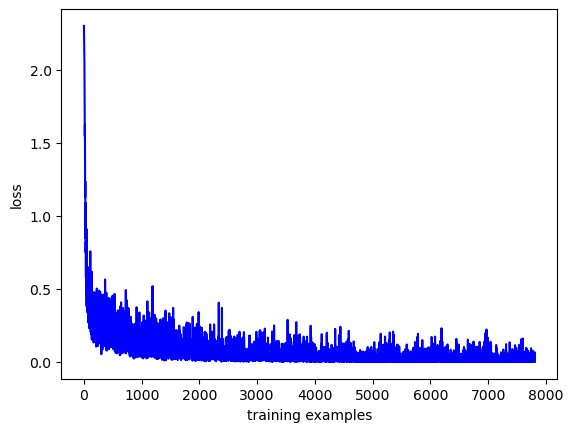

In [4]:
#training parameters
epochs = 10
batch_size = 64
#train and save
mlp_net.train_model((train,val,test), epochs, batch_size, device, save="mlp_net.pt")


At the end of training, we achieve >97% accuracy on the validation training set.
The final model is saved in "models/saved_networks/mlp_net" 